# <center>Bad Bank Behavior<br>Analyzing Bank Mortgage during the 2007 Housing Bubble</center>  

<center>Michael Siebel</center>
<center>August 2020</center>

<br>
    
## Table of Contents
- [Goals](#Goals)<br>
- [Load Packages](#Load-Packages)<br>
- [Set Up Functions](#Set-Up-Functions)<br>
- [Implement Data Cleanings](#Implement-Data-Cleanings)<br>
- [Analysis Functions](#Analysis-Functions)<br>
- [Imbalanced Prediction](#Imbalanced-Prediction)
- [Downsampling Prediction](#Downsampling-Prediction)<br>
- [Upsampling Prediction](#Upsampling-Prediction)<br>
- [Conclusion](#Conclusion)<br>

# Goals  
<br>

 

***

# Load Functions

In [1]:
%run Functions.ipynb
pd.set_option("display.max_columns", 999)

file_to_open = open('..\Data\df.pkl', 'rb') 
df  = pickle.load(file_to_open) 
file_to_open.close()

# Drop mergeID column
df = df.drop(labels='Loan ID', axis=1)

jtplot.style(ticks=True, grid=False)
import plotly.io as pio
from IPython.display import HTML
from PIL import Image

# Foreclosure Descriptive Statistics

In [12]:
print('Shape:\n', df.shape)
print('\nColumns:\n', df.columns)

Shape:
 (2572751, 57)

Columns:
 Index(['Origination Channel', 'Bank', 'Original Interest Rate',
       'Original Mortgage Amount', 'Original Loan Term', 'Original Date',
       'Original Combined Loan-to-Value (CLTV)', 'Single Borrower',
       'Original Debt to Income Ratio', 'First Time Home Buyer',
       'Loan Purpose', 'Property Type', 'Occupancy Type', 'Property State',
       'Zip Code', 'Mortgage Insurance %', 'Mortgage Insurance Type',
       'File Year', 'File Quarter', 'Foreclosed', 'Month', 'Year',
       'Harmonized Credit Score', 'Loan Change (1 Year)',
       'Loan Change (5 Years)', 'FIPS', 'Median Household Income', 'Region',
       'Household Financial Obligations (Qtr)',
       'Household Financial Obligations (Yr)',
       'Consumer Debt Service Payment (Qtr)',
       'Consumer Debt Service Payment (Yr)', 'National Home Price Index (Qtr)',
       'National Home Price Index (Yr)',
       'Mortgage Debt Service Payments (Qtr)',
       'Mortgage Debt Service Payments 

In [3]:
print('Year 2005')
print(df.loc[df['File Year']=='2005', 'Bank'].value_counts())
print('\n')

print('Year 2006')
print(df.loc[df['File Year']=='2006', 'Bank'].value_counts())
print('\n')

print('Year 2007')
print(df.loc[df['File Year']=='2007', 'Bank'].value_counts())

Year 2005
OTHER                                        378613
BANK OF AMERICA, N.A.                        352792
SMALL LOAN BANKS                             154126
CITIMORTGAGE, INC.                           152055
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION    112676
GMAC MORTGAGE                                 89859
SUNTRUST MORTGAGE INC.                        65011
FLAGSTAR CAPITAL MARKETS CORPORATION          62164
AMTRUST BANK                                  43319
FIRST TENNESSEE BANK NATIONAL ASSOCIATION     40493
CHASE HOME FINANCE                             5223
Name: Bank, dtype: int64


Year 2006
BANK OF AMERICA, N.A.                        251159
OTHER                                        246941
CITIMORTGAGE, INC.                           113565
SMALL LOAN BANKS                             104298
GMAC MORTGAGE                                 93318
SUNTRUST MORTGAGE INC.                        76612
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION     56679
AMTRUST BANK     

In 2006 and 2005, **FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB** did not make enough loans to be displayed in the data.

In 2005, **PNC BANK, N.A** did not make enough loans to be displayed in the data.

In [4]:
print('Year 2005')
display(Foreclosure_Data(df = df, subset = "df['File Year']=='2005'").iloc[:,:2])
print('\n')

print('Year 2006')
display(Foreclosure_Data(df = df, subset = "df['File Year']=='2006'").iloc[:,:2])
print('\n')

print('Year 2007')
display(Foreclosure_Data(df = df, subset = "df['File Year']=='2007'").iloc[:,:2])

Year 2005


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Not Foreclosed,94.8,1380469
Foreclosed,5.2,75862




Year 2006


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Not Foreclosed,92.5,1009958
Foreclosed,7.5,81788




Year 2007


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Not Foreclosed,91.7,1138262
Foreclosed,8.3,102675


In [5]:
# Number of loans per bank
# Drop "OTHER"  and "SMALL LOAN BANKS" Categories
df = df[df['Bank'] != 'OTHER']
df = df[df['Bank'] != 'SMALL LOAN BANKS']
df = df[df['Bank'] != 'FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB']
df['Bank'].value_counts()

BANK OF AMERICA, N.A.                        975374
CITIMORTGAGE, INC.                           401156
GMAC MORTGAGE                                262019
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION    257610
SUNTRUST MORTGAGE INC.                       195171
FLAGSTAR CAPITAL MARKETS CORPORATION         125532
AMTRUST BANK                                 119659
FIRST TENNESSEE BANK NATIONAL ASSOCIATION     97673
PNC BANK, N.A.                                94593
CHASE HOME FINANCE                            43964
Name: Bank, dtype: int64

In [6]:
print('Year 2005')
display(Foreclosure_Data(df = df, subset = "df['File Year']=='2005'").iloc[:,:2])
print('\n')

print('Year 2006')
display(Foreclosure_Data(df = df, subset = "df['File Year']=='2006'").iloc[:,:2])
print('\n')

print('Year 2007')
display(Foreclosure_Data(df = df, subset = "df['File Year']=='2007'").iloc[:,:2])

Year 2005


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Not Foreclosed,94.2,869947
Foreclosed,5.8,53645




Year 2006


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Not Foreclosed,91.7,679351
Foreclosed,8.3,61156




Year 2007


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Not Foreclosed,91.1,827841
Foreclosed,8.9,80811


**SMALL LOAN BANKS** and **OTHER** had less foreclosures, particularly in 2006 and 2007, than the major lenders.

In [7]:
df_YrQtr = {}
YrQtr = {}
Qtr = ('Q1', 'Q2', 'Q3', 'Q4')
Yr = ('2005', '2006', '2007')
i = 0
for yr in Yr:
    for qtr in Qtr:
        df_YrQtr[i] = pd.DataFrame(df)
        df_YrQtr[i] = df_YrQtr[i].loc[df_YrQtr[i]['File Year']==yr,:]
        df_YrQtr[i] = df_YrQtr[i].loc[df_YrQtr[i]['File Quarter']==qtr,:]
        YrQtr[i] = str(yr + qtr)
        i += 1
        
print('Number of time series', len(df_YrQtr))

Number of time series 12


In [8]:
gif_frames = list()
for i in range(len(df_YrQtr)):
    
    # Foreclosures
    Foreclosed = Foreclosure_Data(df = df_YrQtr[i])
    
    # Graphing target variable
    jtplot.style(ticks=True, grid=False)
    fig = plt.figure(figsize=(14,4))
    bars = Foreclosed.loc[:, 'Foreclosed (%)']
    bars.plot.barh(color='#ca2c92').invert_yaxis()
    plt.title(str('Foreclosures for ' + YrQtr[i]), fontsize=18)
    
    # Labels
    ls = bars.values
    xs = bars.values
    ys = np.array([0, 1])
    for x,y,l in zip(xs,ys,ls):
        label = "{:.1f}".format(l)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(3,0), # distance from text to points (x,y)
                     color='white',
                     ha='left') # horizontal alignment can be left, right or center

    plt.ylabel('Percentage')
    plt.xlim([0,100])
    
    plt.savefig(str("GIF_Frames/Foreclosures_" + str(i) + ".png"), transparent=False)
    plt.close(fig)
    gif = Image.open(str("GIF_Frames/Foreclosures_" + str(i) + ".png"))
    gif_frames.append(gif)

# Save GIF
gif_frames[0].save('GIF_Frames/Foreclosures.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=900, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/Foreclosures.gif">')

# Bank Descriptive Statistics

In [8]:
Banks = Bank_Data(df = df)
Banks

,Bank (%),Bank (N),Foreclosed (%),Mortgage Amount ($),Credit Score,Debt to Income Ratio,First Time Home Buyer (%),Refinance,Interest Rate,Loan Term,Combined Loan-to-Value (CLTV),Single Borrower Ratio,Mortgage Insurance Ratio,Mortgage Insurance %,Median Household Income ($)
Bank,,,,,,,,,,,,,,,
AMTRUST BANK,4.7,119659,6.8,183674.49,729,37.3,9.4,56.9,6.08,328,72.4,0.44,0.20,3.03,45837.09
"BANK OF AMERICA, N.A.",37.9,975374,9.0,180587.13,714,38.1,8.6,66.5,6.24,334,72.0,0.49,0.26,3.88,46655.08
CHASE HOME FINANCE,1.7,43964,8.1,183551.36,730,39.7,13.2,43.4,6.36,339,73.7,0.48,0.25,4.01,45898.52
"CITIMORTGAGE, INC.",15.6,401156,5.8,203101.84,724,34.9,13.6,61.1,6.06,320,70.1,0.42,0.16,2.59,47336.94
FIRST TENNESSEE BANK NATIONAL ASSOCIATION,3.8,97673,5.6,182321.12,728,38.4,9.8,59.0,6.20,334,74.3,0.40,0.21,3.37,45945.51
FLAGSTAR CAPITAL MARKETS CORPORATION,4.9,125532,9.4,171766.89,717,40.3,10.0,61.9,6.18,336,73.1,0.49,0.25,4.02,45647.20
GMAC MORTGAGE,10.2,262019,7.4,191151.41,715,38.9,4.2,73.2,6.19,339,68.6,0.45,0.11,1.70,47382.34
"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",10.0,257610,5.6,188092.02,725,34.8,7.2,64.1,6.06,317,69.8,0.44,0.17,2.66,46385.58
"PNC BANK, N.A.",3.7,94593,7.9,180099.77,729,38.6,13.0,54.8,6.46,339,74.4,0.46,0.37,3.63,46919.61


In [10]:
# Banks represented
Banks[['Bank (%)', 'Bank (N)', 'Foreclosed (%)']]

,Bank (%),Bank (N),Foreclosed (%)
Bank,,,
AMTRUST BANK,4.7,119659,6.8
"BANK OF AMERICA, N.A.",37.9,975374,9.0
CHASE HOME FINANCE,1.7,43964,8.1
"CITIMORTGAGE, INC.",15.6,401156,5.8
FIRST TENNESSEE BANK NATIONAL ASSOCIATION,3.8,97673,5.6
FLAGSTAR CAPITAL MARKETS CORPORATION,4.9,125532,9.4
GMAC MORTGAGE,10.2,262019,7.4
"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",10.0,257610,5.6
"PNC BANK, N.A.",3.7,94593,7.9


In [9]:
def search_Banks(col, df = Banks, func = max, subset = True):
    print(col, func.__name__, "value")
    if (subset): cols = col
    else: cols = df.columns
    values = pd.DataFrame(df[cols][df[col] == func(df[col])])
    return values

search_Banks('Foreclosed (%)', func = max)

Foreclosed (%) max value


,Foreclosed (%)
Bank,
FLAGSTAR CAPITAL MARKETS CORPORATION,9.4


In [10]:
# Min value
search_Banks('Foreclosed (%)', func = min)

Foreclosed (%) min value


,Foreclosed (%)
Bank,
FIRST TENNESSEE BANK NATIONAL ASSOCIATION,5.6
"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.6


In [13]:
df_YrQtr[0]['File Year'].head()

1      2005
13     2005
37     2005
201    2005
202    2005
Name: File Year, dtype: object

In [14]:
# Worst actor
for i in range(len(df_YrQtr)):
    print(YrQtr[i])
    Banks_qtr = Bank_Data(df = df_YrQtr[i])
    tbl = search_Banks('Foreclosed (%)', func = max, df = Banks_qtr)
    print(tbl[['Foreclosed (%)']])
    print('')

2005Q1
Foreclosed (%) max value
                                      Foreclosed (%)
Bank                                                
FLAGSTAR CAPITAL MARKETS CORPORATION             6.4

2005Q2
Foreclosed (%) max value
                                      Foreclosed (%)
Bank                                                
FLAGSTAR CAPITAL MARKETS CORPORATION             7.6

2005Q3
Foreclosed (%) max value
                                      Foreclosed (%)
Bank                                                
FLAGSTAR CAPITAL MARKETS CORPORATION             8.1

2005Q4
Foreclosed (%) max value
                                      Foreclosed (%)
Bank                                                
FLAGSTAR CAPITAL MARKETS CORPORATION             9.7

2006Q1
Foreclosed (%) max value
                                      Foreclosed (%)
Bank                                                
FLAGSTAR CAPITAL MARKETS CORPORATION            11.2

2006Q2
Foreclosed (%) max value
        

In [15]:
# Best actor
for i in range(len(df_YrQtr)):
    print(YrQtr[i])
    Banks_qtr = Bank_Data(df = df_YrQtr[i])
    tbl = search_Banks('Foreclosed (%)', func = min, df = Banks_qtr)
    print(tbl[['Foreclosed (%)']])
    print('')

2005Q1
Foreclosed (%) min value
                        Foreclosed (%)
Bank                                  
SUNTRUST MORTGAGE INC.             2.9

2005Q2
Foreclosed (%) min value
                    Foreclosed (%)
Bank                              
CITIMORTGAGE, INC.             3.5

2005Q3
Foreclosed (%) min value
                                           Foreclosed (%)
Bank                                                     
FIRST TENNESSEE BANK NATIONAL ASSOCIATION             4.2

2005Q4
Foreclosed (%) min value
                    Foreclosed (%)
Bank                              
CITIMORTGAGE, INC.             4.8

2006Q1
Foreclosed (%) min value
                    Foreclosed (%)
Bank                              
CITIMORTGAGE, INC.             5.5

2006Q2
Foreclosed (%) min value
                                           Foreclosed (%)
Bank                                                     
CITIMORTGAGE, INC.                                    6.3
JPMORGAN CHASE BANK, NA

In [86]:
plt.close()
gif_frames = []
plot_qtr = {}
plot_df = pd.DataFrame(index=Banks.index, columns=YrQtr.values())

# Mortgage Amount ($) line chart
for j in range(len(df_YrQtr)):
    plot_qtr[j] = pd.DataFrame(Bank_Data(df = df_YrQtr[j]).loc[:, 'Foreclosed (%)'])
    plot_qtr[j] = plot_qtr[j].rename(columns={'Foreclosed (%)': str(YrQtr[j])})
    plot_df.loc[:,str(YrQtr[j])] = plot_qtr[j].loc[:,str(YrQtr[j])]

plt.rcParams['figure.figsize']=(16,10) 
plot_dfs = pd.DataFrame(index=Banks.index, columns=YrQtr.values()).T
for j in range(0, len(plot_dfs.columns)):
    for i in range(0, len(plot_dfs.index)):
        plot_dfs.iloc[:i+1,j] = plot_df.T.iloc[:i+1,j]
        fig, ax = plt.subplots()
        ax.plot(plot_dfs.index, plot_dfs, linewidth=5, alpha=1)
        plt.gca().set_prop_cycle(None)
        ax.plot(plot_df.T.index, plot_df.T, linewidth=2, alpha=0.33)

        ax.set_title('Bank Foreclosure Rates\n' + plot_dfs.columns[j] + ' ' + YrQtr[i])
        plt.axis(ymin=0, ymax=12)
        ax.set_ylabel('Foreclosures (%)')
        ax.set_xlabel('Quarter')
        ax.legend(plot_df.T.columns, loc='lower right', fontsize=12)
        
        plt.savefig(str("GIF_Frames/Bank_Foreclosures_" + plot_dfs.columns[j] + '_' + YrQtr[i] + ".png"), transparent=False)
        plt.close(fig)
        gif = Image.open(str("GIF_Frames/Bank_Foreclosures_" + plot_dfs.columns[j] + '_' + YrQtr[i] + ".png"))
        gif_frames.append(gif)
        
# Save GIF
gif_frames[0].save('GIF_Frames/Bank_Foreclosures.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=200, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/Bank_Foreclosures.gif">')       

In [80]:
colors = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A","#66A61E", "#E6AB02", "#A6761D", "#666666","#FC8D62", "#E78AC3","#FFD92F", "#B3B3B3"]

In [ ]:
plot_df

AttributeError: 'list' object has no attribute 'get_label'

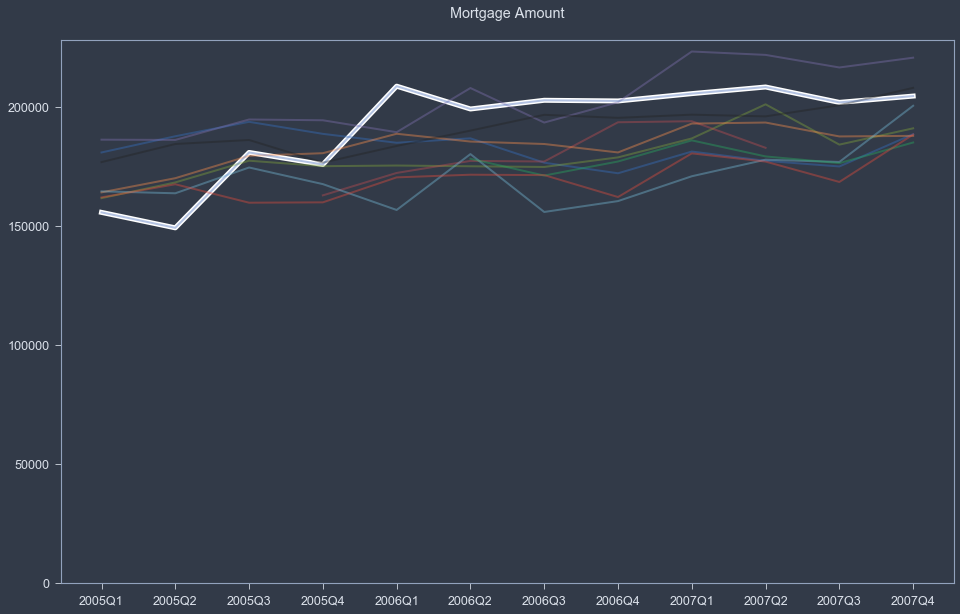

In [105]:
plt.close()
plot_df = pd.DataFrame(index=Banks.index, columns=YrQtr.values())

# Mortgage Amount ($) line chart
for j in range(len(df_YrQtr)):
    plot_qtr[j] = pd.DataFrame(Bank_Data(df = df_YrQtr[j]).loc[:, 'Mortgage Amount ($)'])
    plot_qtr[j] = plot_qtr[j].rename(columns={'Mortgage Amount ($)': str(YrQtr[j])})
    plot_df.loc[:,str(YrQtr[j])] = plot_qtr[j].loc[:,str(YrQtr[j])]
    
plot_dfs = plot_df.T
diff = {}
for c in plot_dfs.columns:
    diff[c] = np.nanmax(plot_dfs.loc[:,c]) - np.nanmin(plot_dfs.loc[:,c])  
max_diff = max(diff, key=diff.get)

plt.rcParams['figure.figsize']=(16,10) 
#plt.rcParams['image.cmap'] = 'jet'
fig = plt.figure()
line1 = plt.plot(plot_dfs.index, plot_dfs.loc[:,max_diff], linewidth=5, alpha=1, color="white")
line2 = plt.plot(plot_dfs.index, plot_dfs, linewidth=2, alpha=0.4)
plt.title('Mortgage Amount\n')
plt.axis(ymin=0, ymax=np.nanmax(plot_dfs)+5000)
plt.legend(handles=[line1, line2], loc='lower right', fontsize=12)

plt.show()

In [37]:
plt.rcParams['figure.figsize']=(16,10) 
#plt.rcParams['image.cmap'] = 'jet'
fig = plt.figure()
plt.plot(plot_dfs.index, alpha=1)
plt.plot(plot_dfs.index, plot_dfs[max_diff], linewidth=5, alpha=1)
plt.plot(plot_dfs.index, plot_dfs, linewidth=2, alpha=0.4)
plt.title('Mortgage Amount\n')
plt.axis(ymin=0, ymax=np.nanmax(plot_dfs)+1000)
plt.legend(plot_df.T.columns, loc='lower right', fontsize=12)

plt.show()

Index([], dtype='object')

In [ ]:
'''
import pickle
file_to_store = open("..\Data\df.pickle", "wb")
pickle.dump(df, file_to_store)
file_to_store.close()
'''

In [ ]:
'''
# List of banks
Banks = ['AMTRUST BANK', 'BANK OF AMERICA, N.A.', 'CITIMORTGAGE, INC.', 
         'FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB', 
         'FIRST TENNESSEE BANK NATIONAL ASSOCIATION', 'FLAGSTAR CAPITAL MARKETS CORPORATION', 
         'GMAC MORTGAGE', 'JPMORGAN CHASE BANK, NATIONAL ASSOCIATION', 'OTHER', 
         'PNC BANK, N.A.', 'SUNTRUST MORTGAGE INC.', 'CHASE HOME FINANCE', 'SMALL LOAN BANKS']

# X and y Data
df_X = onehotencoding(df)
df_y = df_X['Foreclosed']
df_X = df_X.drop(labels='Foreclosed', axis=1) 

# Create dictionary of subsetted bank data
Banks_X, Banks_y = Bank_Subsets(Banks, df_X = df_X, df_y = df_y)
'''

In [ ]:
from urllib.request import urlopen
import json

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [ ]:
# Foreclosures
FIPS_Foreclosures = df.groupby(['Zip Code']).agg({'Foreclosed': 'mean'})*100
FIPS_Foreclosures = FIPS_Foreclosures.round(1)
FIPS_Foreclosures = FIPS_Foreclosures.reset_index()
FIPS_Foreclosures['Zip Code'] = FIPS_Foreclosures['Zip Code'].astype(str)
FIPS_Foreclosures['Zip Code'] = FIPS_Foreclosures['Zip Code'].str.ljust(3, '0')

# Import county zipcode crosswalk
crosswalk = pd.read_csv("..\Data\ZIP-COUNTY-FIPS_2017-06.csv",
                        header = 0)
crosswalk = crosswalk.rename(columns={'ZIP': 'Zip Code', 'COUNTYNAME': 'County', 'STCOUNTYFP': 'FIPS'})
crosswalk = crosswalk.loc[:, ['Zip Code', 'County', 'FIPS']]
crosswalk['Zip 5'] = crosswalk['Zip Code']
crosswalk['Zip Code'] = crosswalk['Zip Code'].astype(str)
crosswalk['Zip Code'] = crosswalk['Zip Code'].str.slice(start=0, stop=-2)
crosswalk['Zip Code'] = crosswalk['Zip Code'].str.ljust(3, '0')
crosswalk['FIPS'] = crosswalk['FIPS'].astype(str)
crosswalk['FIPS'] = crosswalk['FIPS'].str.rjust(5, '0')

# Merge
FIPS_Foreclosures = pd.merge(FIPS_Foreclosures, crosswalk, on='Zip Code', how='outer')
FIPS_Foreclosures.head()

In [ ]:
# Remove Outliers
FIPS_Foreclosures = FIPS_Foreclosures.loc[FIPS_Foreclosures['Foreclosed']!=100, :]
FIPS_Foreclosures = FIPS_Foreclosures.loc[FIPS_Foreclosures['Foreclosed']!=50, :]
FIPS_Foreclosures.loc[FIPS_Foreclosures['Foreclosed']>30, :].value_counts()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Graph
fig = go.Figure(data=go.Choropleth(
    locations=FIPS_Foreclosures['FIPS'], # Spatial coordinates
    z = FIPS_Foreclosures['Foreclosed'].astype(float), # Data to be color-coded
    locationmode = 'geojson-id', # set of locations match entries in `locations`
    geojson = counties,
    colorscale = px.colors.sequential.Blues[3:],
    marker_line_color=px.colors.sequential.Blues[3], 
    colorbar_title = "Forclosures (%)"
))

fig.update_layout(
    title_text = "Forclosures by FIPS Counties, 2005-2007",
    geo_scope='usa', # limite map scope to USA
    margin={"r":0,"l":0,"b":0}
)

fig.show()

In [ ]:
df_YrQtr = {}
YrQtr = {}
Qtr = ('Q1', 'Q2', 'Q3', 'Q4')
Yr = ('2005', '2006', '2007')
i = 0
for yr in Yr:
    for qtr in Qtr:
        df_YrQtr[i] = pd.DataFrame(df)
        df_YrQtr[i] = df_YrQtr[i].loc[df_YrQtr[i]['File Year']==yr,:]
        df_YrQtr[i] = df_YrQtr[i].loc[df_YrQtr[i]['File Quarter']==qtr,:]
        df_YrQtr[i] = df_YrQtr[i][['Property State', 'Zip Code', 'Foreclosed']]
        YrQtr[i] = str(yr + qtr)
        i += 1
        
print('Number of datasets', len(df_YrQtr))

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import HTML
from PIL import Image
# from IPython.display import Image as IPyIm

fig = {}
frames = list()
gif_frames = list()

for i in range(len(df_YrQtr)):
    # Foreclosures
    State_Foreclosures = df_YrQtr[i].groupby(['Property State']).agg({'Foreclosed': 'mean'})*100
    State_Foreclosures = State_Foreclosures.round(1)
    
    # Graph
    fig[i] = go.Figure(data=go.Choropleth(
        locations=State_Foreclosures.index, # Spatial coordinates
        z = State_Foreclosures['Foreclosed'].astype(float), # Data to be color-coded
        zmin = 0,
        zmax = 30,
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = px.colors.sequential.Purples[3:],
        marker_line_color=px.colors.sequential.Purples[3],
        colorbar_title = "Forclosures (%)"
    ))
    
    fig[i].update_layout(
        title_text = str("Forclosures by State, " + YrQtr[i]),
        geo_scope='usa', # limite map scope to USA
        margin={"r":0,"l":0,"b":0}
    )
    
    pio.write_image(fig[i], str("GIF_Frames/State_Foreclosures_" + str(i) + ".png"))
    # frame = pio.to_image(fig[i], format="png")
    # frames.append(IPyIm(frame))
    # display(frames[i])
    gif = Image.open(str("GIF_Frames/State_Foreclosures_" + str(i) + ".png"))
    gif_frames.append(gif)

# Save GIF
gif_frames[0].save('GIF_Frames/State_Foreclosures.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=900, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/State_Foreclosures.gif">')

In [ ]:
# Import county zipcode crosswalk
crosswalk = pd.read_csv("..\Data\ZIP-COUNTY-FIPS_2017-06.csv",
                        header = 0)
crosswalk = crosswalk.rename(columns={'ZIP': 'Zip Code', 'COUNTYNAME': 'County', 'STCOUNTYFP': 'FIPS'})
crosswalk = crosswalk.loc[:, ['Zip Code', 'County', 'FIPS']]
crosswalk['Zip 5'] = crosswalk['Zip Code']
crosswalk['Zip Code'] = crosswalk['Zip Code'].astype(str)
crosswalk['Zip Code'] = crosswalk['Zip Code'].str.ljust(5, '0')
crosswalk['Zip Code'] = crosswalk['Zip Code'].str.slice(start=0, stop=-2)
crosswalk['FIPS'] = crosswalk['FIPS'].astype(str)
crosswalk['FIPS'] = crosswalk['FIPS'].str.rjust(5, '0')

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import HTML
from PIL import Image
# from IPython.display import Image as IPyIm

fig = {}
frames = list()
gif_frames = list()

for i in range(len(df_YrQtr)):
    # Foreclosures
    FIPS_Foreclosures = df_YrQtr[i].groupby(['Zip Code']).agg({'Foreclosed': 'mean'})*100
    FIPS_Foreclosures = FIPS_Foreclosures.round(1)
    FIPS_Foreclosures = FIPS_Foreclosures.reset_index()
    FIPS_Foreclosures['Zip Code'] = FIPS_Foreclosures['Zip Code'].astype(str)
    FIPS_Foreclosures['Zip Code'] = FIPS_Foreclosures['Zip Code'].str.ljust(3, '0')
    
    # Merge
    FIPS_Foreclosures = pd.merge(FIPS_Foreclosures, crosswalk, on='Zip Code', how='outer')
    
    # Remove Outliers
    FIPS_Foreclosures = FIPS_Foreclosures.loc[FIPS_Foreclosures['Foreclosed']!=100, :]
    FIPS_Foreclosures = FIPS_Foreclosures.loc[FIPS_Foreclosures['Foreclosed']!=50, :]
    
    # Graph
    fig[i] = go.Figure(data=go.Choropleth(
        locations = FIPS_Foreclosures['FIPS'], # Spatial coordinates
        z = FIPS_Foreclosures['Foreclosed'].astype(float), # Data to be color-coded
        zmin = 0,
        zmax = 30,
        locationmode = 'geojson-id', # set of locations match entries in `locations`
        geojson = counties,
        colorscale = px.colors.sequential.Blues[3:],
        marker_line_color=px.colors.sequential.Blues[3], 
        colorbar_title = "Forclosures (%)"
    ))
    
    fig[i].update_layout(
        title_text = str("Forclosures by County, " + YrQtr[i]),
        geo_scope='usa', # limite map scope to USA
        margin={"r":0,"l":0,"b":0}
    )
    
    pio.write_image(fig[i], str("GIF_Frames/County_Foreclosures_" + str(i) + ".png"))
    gif = Image.open(str("GIF_Frames/County_Foreclosures_" + str(i) + ".png"))
    gif_frames.append(gif)

# Save GIF
gif_frames[0].save('GIF_Frames/County_Foreclosures.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=1300, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/County_Foreclosures.gif">')